In [1]:
## CENSUS INCOME PROJECT

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [3]:
df.head(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


In [4]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [5]:
df.isnull().sum() ## checking for null values

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [6]:
## looks like there are no null values 

In [7]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df.shape

(32560, 15)

In [9]:
## dropping the unnecessary columns

In [10]:
df.drop(['Marital_status','Relationship','Race'],axis=1)

,Age,Workclass,Fnlwgt,Education,Education_num,Occupation,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Exec-managerial,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Handlers-cleaners,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Handlers-cleaners,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Prof-specialty,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Exec-managerial,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Tech-support,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Machine-op-inspct,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Adm-clerical,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Adm-clerical,Male,0,0,20,United-States,<=50K


In [11]:
## exploring the continuous variables

In [12]:
cont_data = df.select_dtypes(exclude = ['object'] )
cont_data

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40
...,...,...,...,...,...,...
32555,27,257302,12,0,0,38
32556,40,154374,9,0,0,40
32557,58,151910,9,0,0,40
32558,22,201490,9,0,0,20


In [13]:
##data distribution

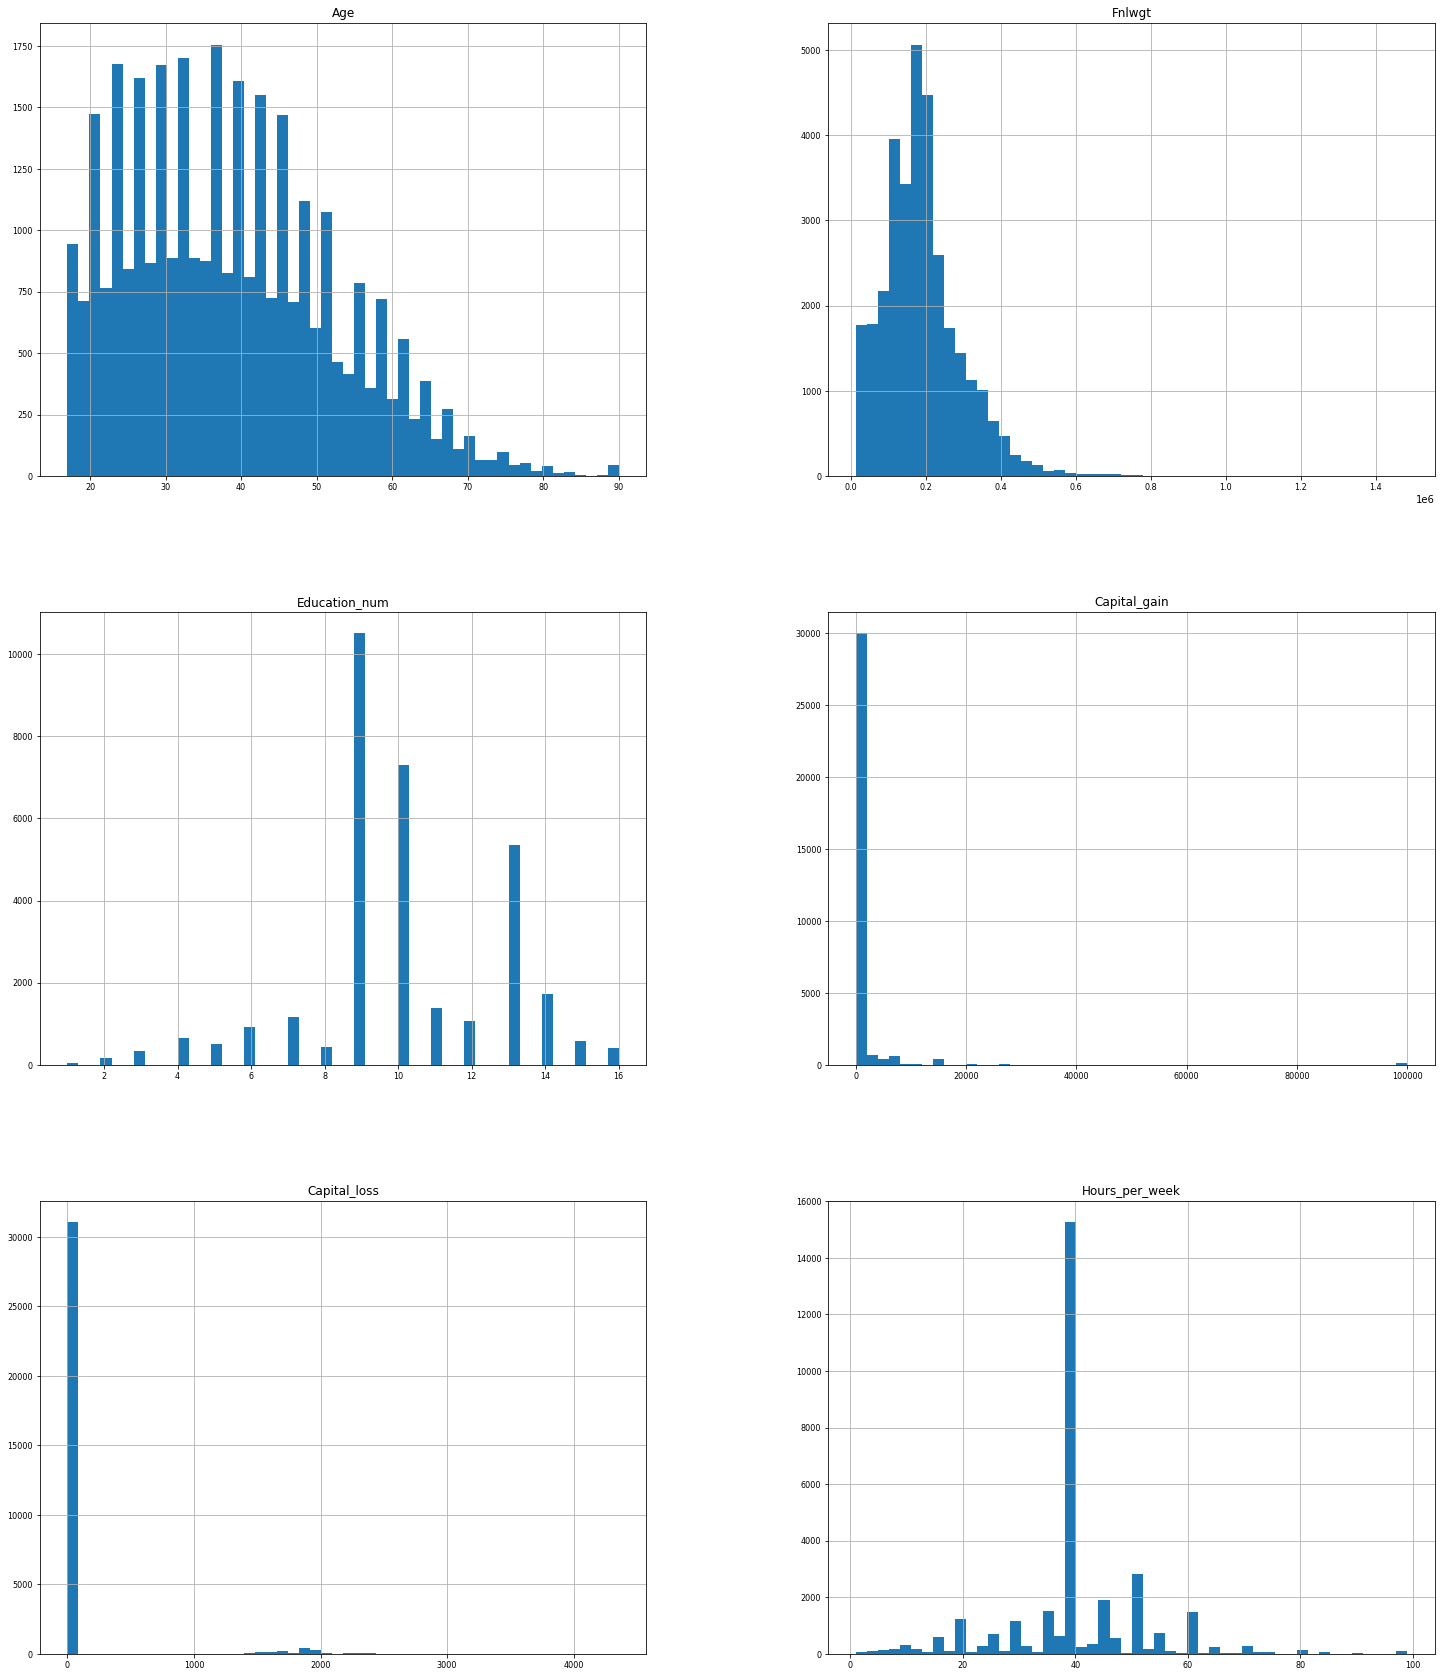

In [14]:
cont_data.hist(figsize = (25, 30), bins = 50, xlabelsize = 8, ylabelsize = 8)
plt.show()

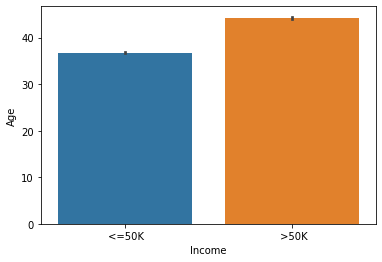

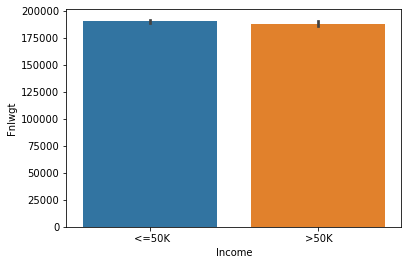

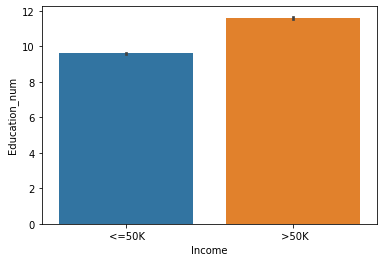

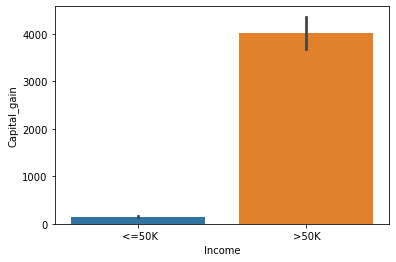

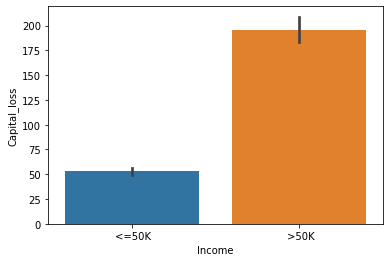

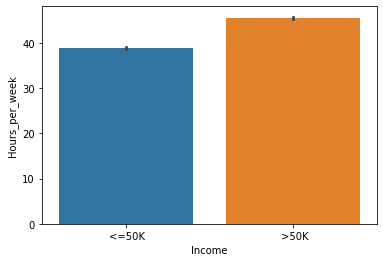

In [15]:
for i in cont_data:
    sns.barplot(y = cont_data[i], x = df['Income'])
    plt.show()

In [16]:
## Checking for outliers

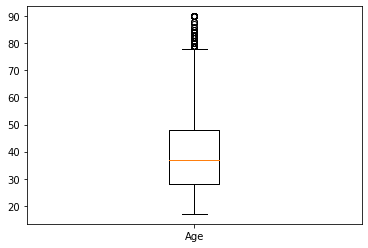

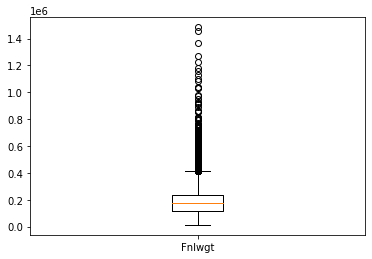

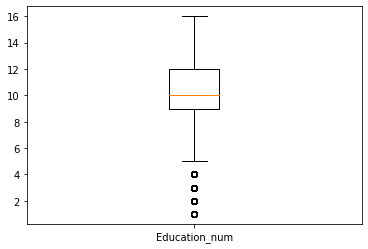

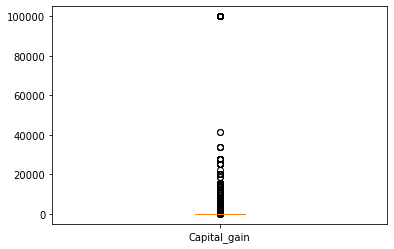

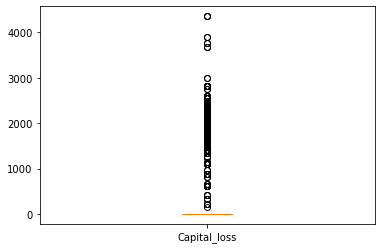

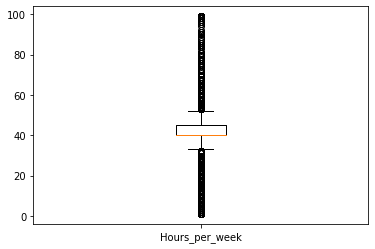

In [17]:
for i in cont_data:
    plt.boxplot(cont_data[i], labels = [i])
    plt.show()

In [18]:
## looks like we are having the outliers  

In [19]:
a=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

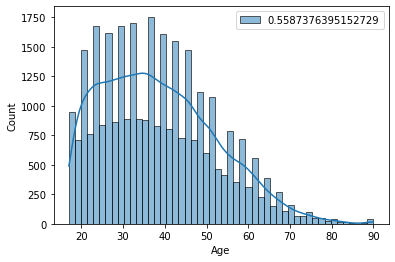

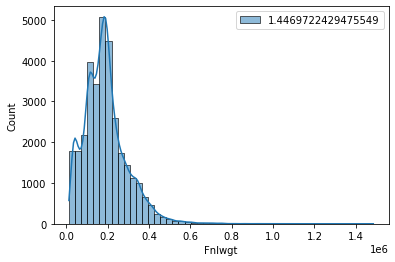

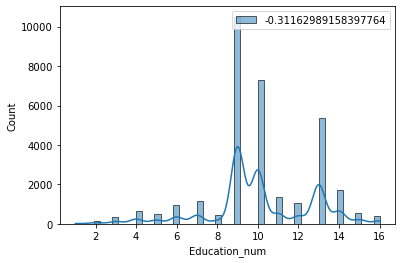

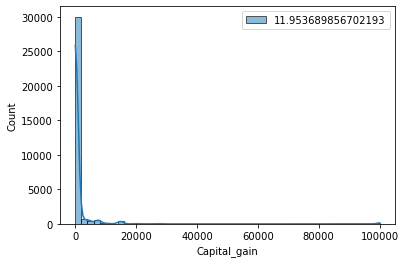

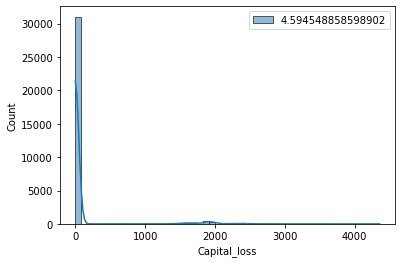

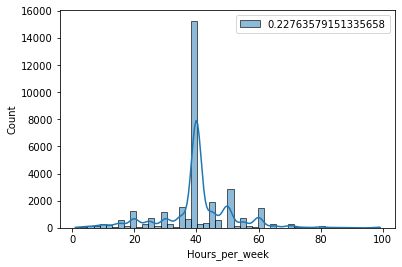

In [20]:
for i in a:
    sns.histplot(cont_data[i], kde = True, bins = 50, label = cont_data[i].skew())
    plt.legend(loc = 'upper right')
    plt.show()

In [21]:
out_vars=['Age','Fnlwgt','Education_num','Capital_gain','Capital_loss','Hours_per_week']

In [22]:
def outlierTreat(x):
    upper = x.quantile(.75) + 1.5 * (x.quantile(.75) - x.quantile(.25)) 
    lower = x.quantile(.25) - 1.5 * (x.quantile(.75) - x.quantile(.25))
    return x.clip(lower, upper)

In [23]:
cont_data.loc[:, out_vars] = cont_data.loc[:, out_vars].apply(outlierTreat)
cont_data.loc[:, out_vars]

C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\pandas\core\indexing.py:1787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13.0,0,0,32.5
1,38,215646,9.0,0,0,40.0
2,53,234721,7.0,0,0,40.0
3,28,338409,13.0,0,0,40.0
4,37,284582,14.0,0,0,40.0
...,...,...,...,...,...,...
32555,27,257302,12.0,0,0,38.0
32556,40,154374,9.0,0,0,40.0
32557,58,151910,9.0,0,0,40.0
32558,22,201490,9.0,0,0,32.5


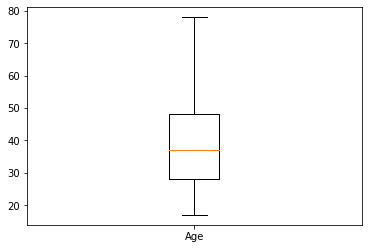

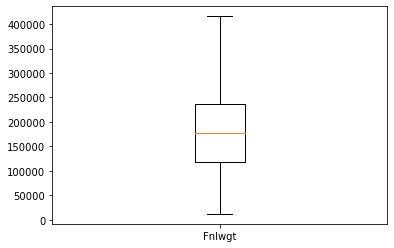

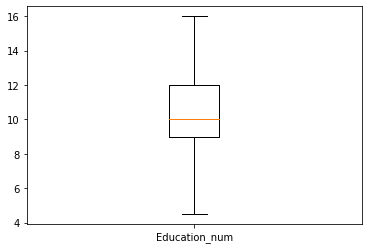

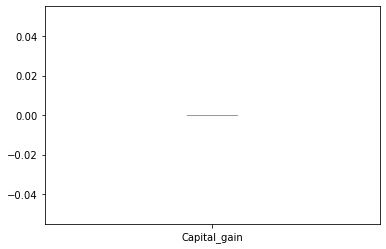

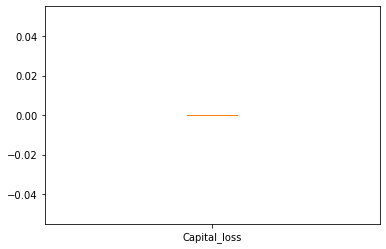

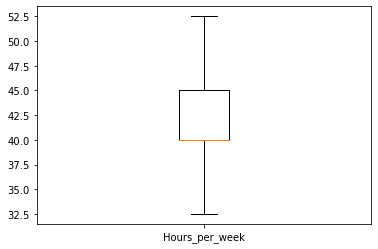

In [24]:
# Using box plot for checking the presence of outliers.
for i in cont_data:
    plt.boxplot(cont_data[i], labels = [i])
    plt.show()

In [25]:
## we are clear now

In [26]:
corr=cont_data.corr()
plt.figure(figsize=(20,25))

<Figure size 1440x1800 with 0 Axes>

<Figure size 1440x1800 with 0 Axes>

<AxesSubplot:>

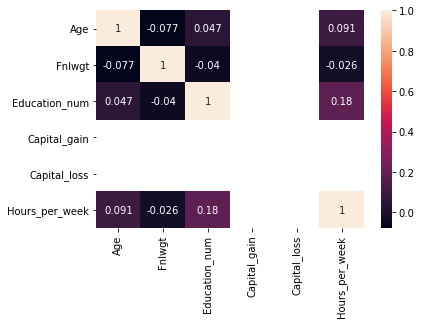

In [27]:
sns.heatmap(corr,annot=True)

In [28]:
## no correlation found

In [29]:
## exploring the categorical variables

In [30]:
cat_vars = df.select_dtypes(include = ['object'])
cat_vars

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [31]:
cat_vars.drop(['Marital_status','Relationship','Race'],axis=1)

,Workclass,Education,Occupation,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Exec-managerial,Male,United-States,<=50K
1,Private,HS-grad,Handlers-cleaners,Male,United-States,<=50K
2,Private,11th,Handlers-cleaners,Male,United-States,<=50K
3,Private,Bachelors,Prof-specialty,Female,Cuba,<=50K
4,Private,Masters,Exec-managerial,Female,United-States,<=50K
...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Tech-support,Female,United-States,<=50K
32556,Private,HS-grad,Machine-op-inspct,Male,United-States,>50K
32557,Private,HS-grad,Adm-clerical,Female,United-States,<=50K
32558,Private,HS-grad,Adm-clerical,Male,United-States,<=50K


In [32]:
cat_vars

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States,<=50K
...,...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [33]:
cat_vars_new=cat_vars.drop(['Marital_status','Relationship','Race'],axis=1)
cat_vars_new

,Workclass,Education,Occupation,Sex,Native_country,Income
0,Self-emp-not-inc,Bachelors,Exec-managerial,Male,United-States,<=50K
1,Private,HS-grad,Handlers-cleaners,Male,United-States,<=50K
2,Private,11th,Handlers-cleaners,Male,United-States,<=50K
3,Private,Bachelors,Prof-specialty,Female,Cuba,<=50K
4,Private,Masters,Exec-managerial,Female,United-States,<=50K
...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Tech-support,Female,United-States,<=50K
32556,Private,HS-grad,Machine-op-inspct,Male,United-States,>50K
32557,Private,HS-grad,Adm-clerical,Female,United-States,<=50K
32558,Private,HS-grad,Adm-clerical,Male,United-States,<=50K


In [34]:
# Count values of different values for each variables.
for i in cat_vars_new:
    print(cat_vars_new[i].value_counts(), end = '\n---------\n\n')

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
---------

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64
---------

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-supp

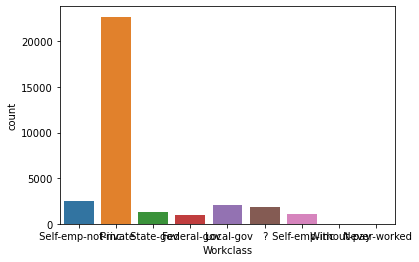

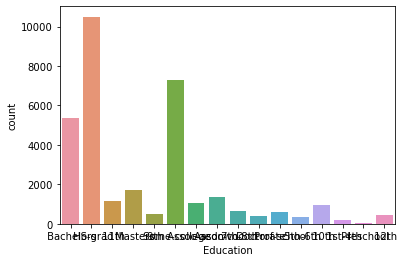

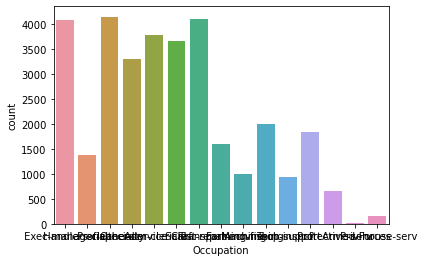

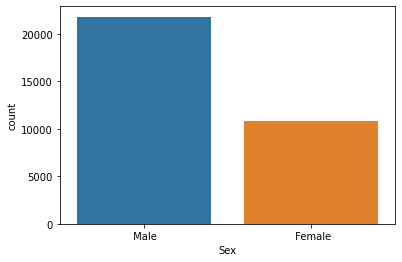

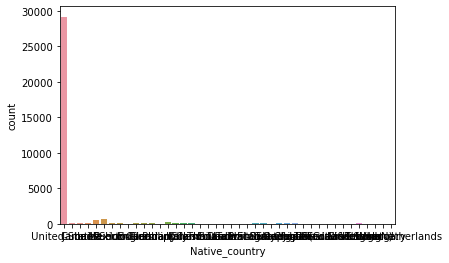

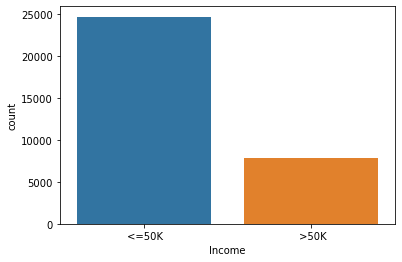

In [35]:
# Looking at the data distribution for different values.
plt.rcParams['figure.figsize'] = (6, 4)
for i in cat_vars_new:
    sns.countplot(x = cat_vars_new[i])
    plt.show()

In [36]:
cat_vars_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Workclass       32560 non-null  object
 1   Education       32560 non-null  object
 2   Occupation      32560 non-null  object
 3   Sex             32560 non-null  object
 4   Native_country  32560 non-null  object
 5   Income          32560 non-null  object
dtypes: object(6)
memory usage: 1.5+ MB


In [37]:
cat_data = cat_vars_new.copy()
cat_data = pd.get_dummies(cat_data, drop_first = True) ## numerical features to continuos features
cat_data

,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,Workclass_ Self-emp-inc,Workclass_ Self-emp-not-inc,Workclass_ State-gov,Workclass_ Without-pay,Education_ 11th,Education_ 12th,...,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia,Income_ >50K
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32556,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
32557,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32558,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


<AxesSubplot:>

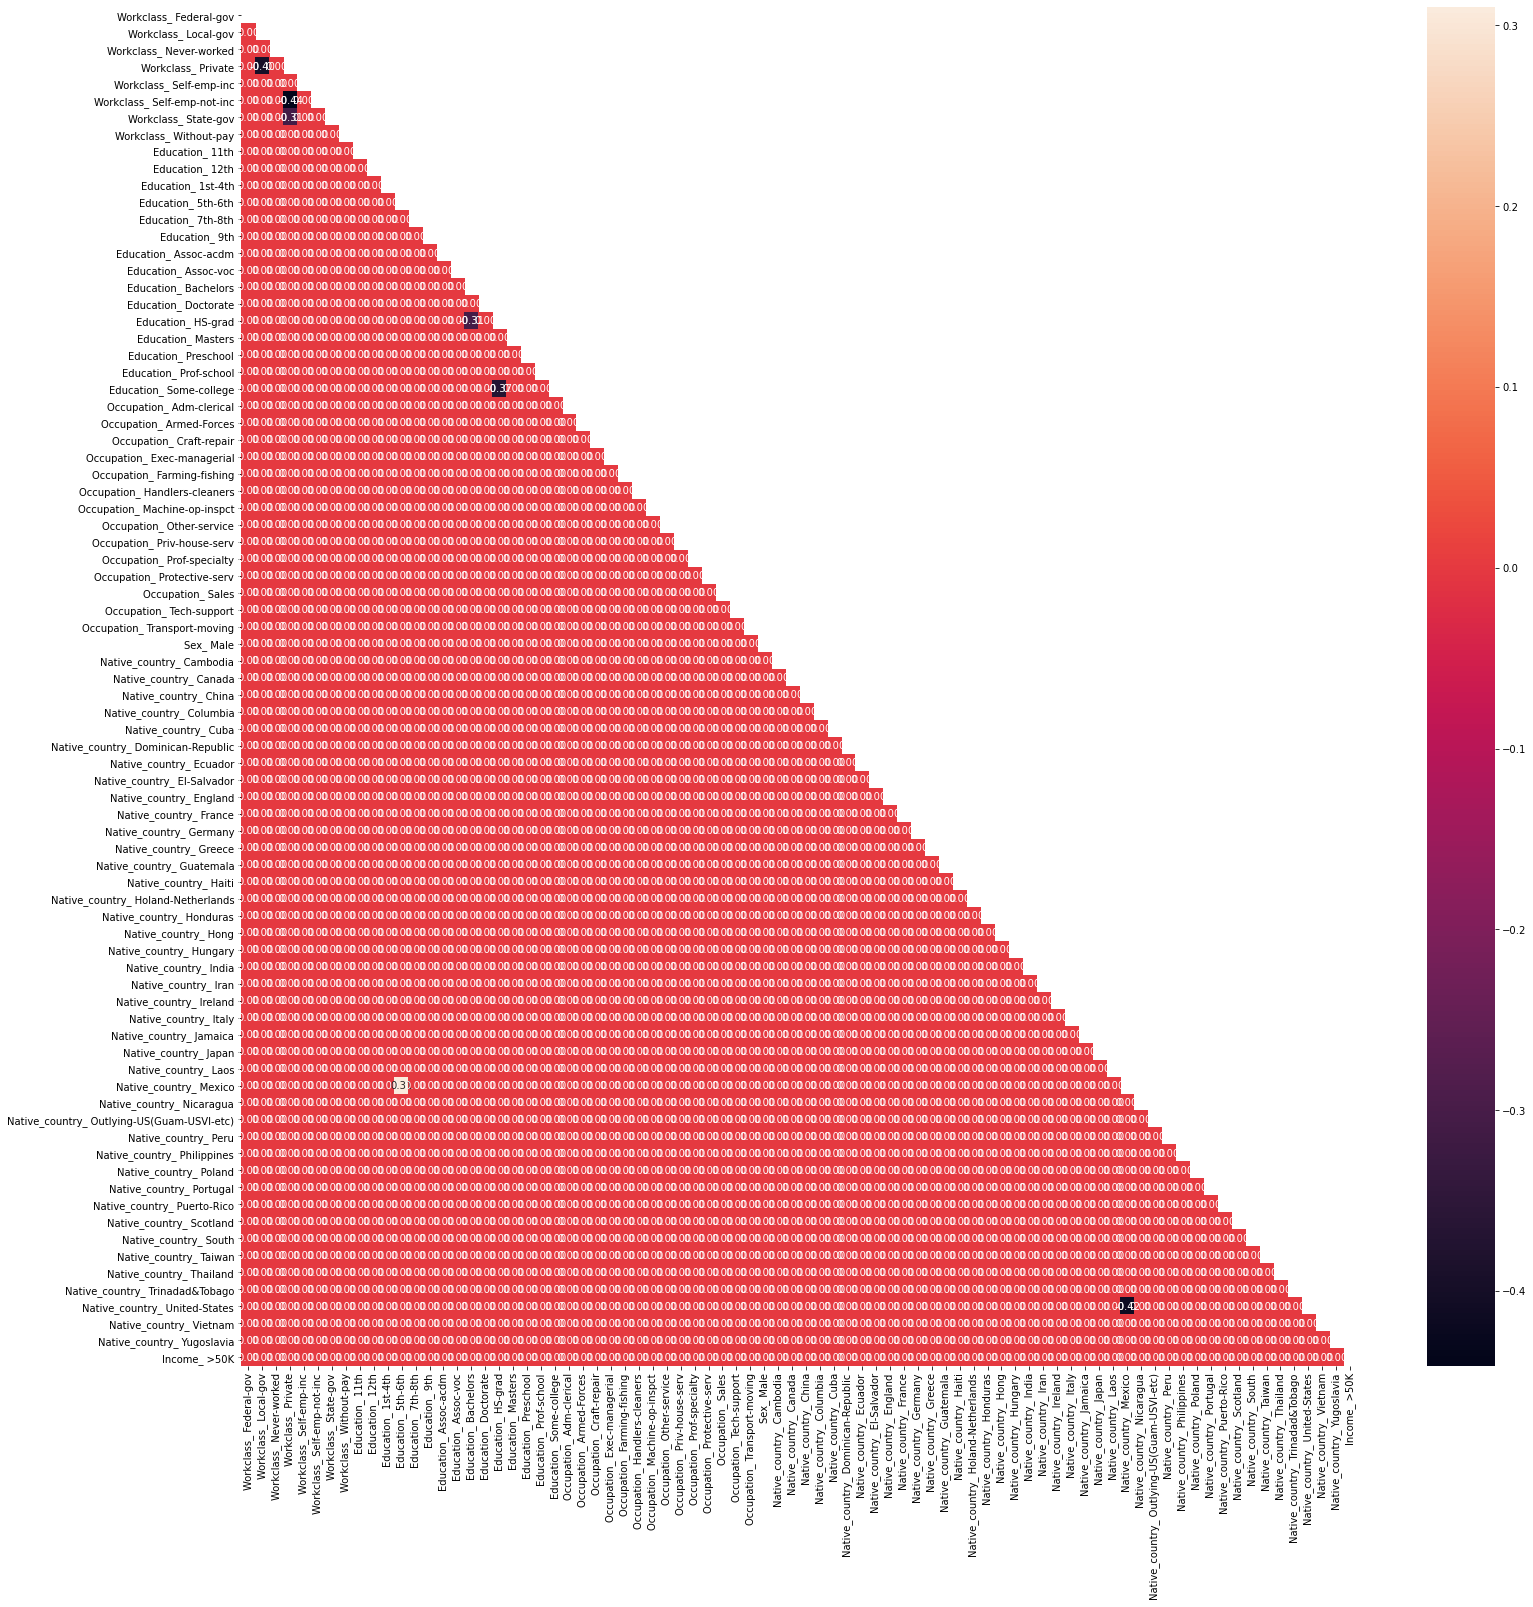

In [38]:
# Finding the correlation.
corr = cat_data.corr()

# Setting the size of figure.
plt.rcParams['figure.figsize'] = (25, 25)

# Argument Trimming out the values above the main diagonal.
mask = np.triu(corr)

# Setting low correlation value to 0.
corr[(corr.values < 0.3) & (corr.values > -0.3)] = 0

# Plotting the heatmap.
sns.heatmap(corr, annot = True, fmt = '.2f', mask = mask)

In [43]:
# Combining Numerical and Categorical data.
final_data = pd.concat([cont_data, cat_data], axis = 1)
final_data

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia,Income_ >50K
0,50,83311,13.0,0,0,32.5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,215646,9.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,53,234721,7.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,28,338409,13.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12.0,0,0,38.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32556,40,154374,9.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
32557,58,151910,9.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32558,22,201490,9.0,0,0,32.5,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [44]:
final_data

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia,Income_ >50K
0,50,83311,13.0,0,0,32.5,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,38,215646,9.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,53,234721,7.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,28,338409,13.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12.0,0,0,38.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32556,40,154374,9.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
32557,58,151910,9.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32558,22,201490,9.0,0,0,32.5,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [45]:
final_data.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia,Income_ >50K
count,32560.000000,32560.000000,32560.000000,32560.0,32560.0,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,...,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.555590,186832.497451,10.124232,0.0,0.0,41.202488,0.029484,0.064281,0.000215,0.697052,...,0.003501,0.000369,0.002457,0.001566,0.000553,0.000584,0.895854,0.002058,0.000491,0.240817
std,13.556338,95129.303699,2.459756,0.0,0.0,6.187097,0.169161,0.245257,0.014661,0.459540,...,0.059068,0.019194,0.049508,0.039547,0.023506,0.024150,0.305455,0.045316,0.022162,0.427586
min,17.000000,12285.000000,4.500000,0.0,0.0,32.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,117831.500000,9.000000,0.0,0.0,40.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,37.000000,178363.000000,10.000000,0.0,0.0,40.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,48.000000,237054.500000,12.000000,0.0,0.0,45.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,78.000000,415889.000000,16.000000,0.0,0.0,52.500000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
cont_data.skew()

Age               0.513883
Fnlwgt            0.548285
Education_num    -0.034043
Capital_gain      0.000000
Capital_loss      0.000000
Hours_per_week    0.438274
dtype: float64

In [47]:
## not much of skewness is found

<AxesSubplot:>

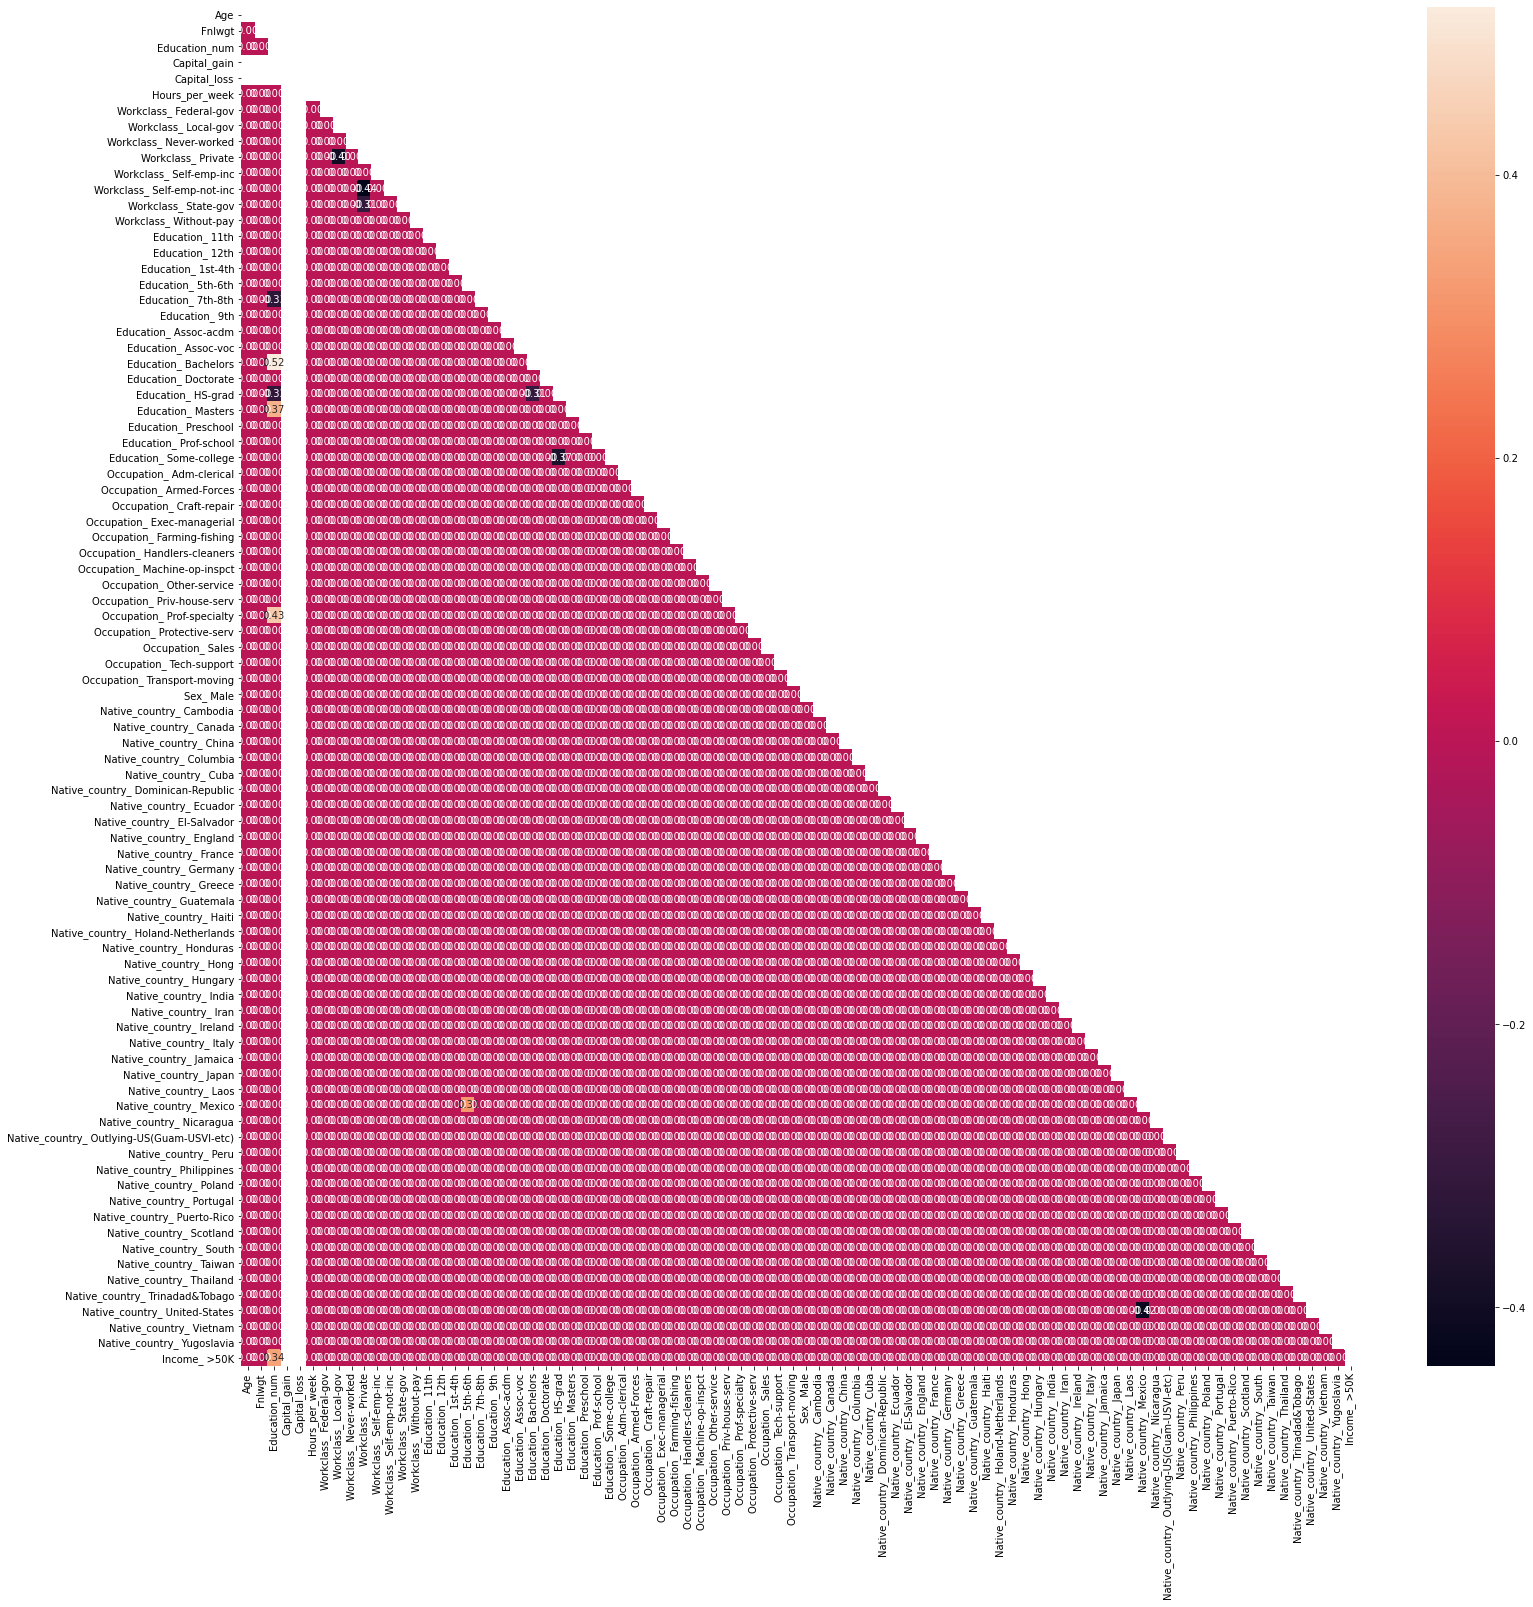

In [48]:
# Finding the correlation.
corr = final_data.corr()

# Setting the size of figure.
plt.rcParams['figure.figsize'] = (25, 25)

# Argument Trimming out the values above the main diagonal.
mask = np.triu(corr)

# Setting low correlation value to 0.
corr[(corr.values < 0.3) & (corr.values > -0.3)] = 0

# Plotting the heatmap.
sns.heatmap(corr, annot = True, fmt = '.2f', mask = mask)

In [49]:
x=final_data.drop(['Income_ >50K'],axis=1) ## independent features

In [50]:
x

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Never-worked,Workclass_ Private,...,Native_country_ Portugal,Native_country_ Puerto-Rico,Native_country_ Scotland,Native_country_ South,Native_country_ Taiwan,Native_country_ Thailand,Native_country_ Trinadad&Tobago,Native_country_ United-States,Native_country_ Vietnam,Native_country_ Yugoslavia
0,50,83311,13.0,0,0,32.5,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,215646,9.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,53,234721,7.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,28,338409,13.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,37,284582,14.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,257302,12.0,0,0,38.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32556,40,154374,9.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32557,58,151910,9.0,0,0,40.0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
32558,22,201490,9.0,0,0,32.5,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [52]:
y=final_data['Income_ >50K'] ## dependent features
y

0        0
1        0
2        0
3        0
4        0
        ..
32555    0
32556    1
32557    0
32558    0
32559    1
Name: Income_ >50K, Length: 32560, dtype: uint8

In [53]:
## STANDARD SCALING

In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:
st=StandardScaler()

In [56]:
st.fit_transform(x)

array([[ 0.84422402, -1.08823552,  1.16914516, ...,  0.34095976,
        -0.04540906, -0.022173  ],
       [-0.04098439,  0.30289242, -0.45705728, ...,  0.34095976,
        -0.04540906, -0.022173  ],
       [ 1.06552612,  0.50341205, -1.2701585 , ...,  0.34095976,
        -0.04540906, -0.022173  ],
       ...,
       [ 1.43436295, -0.36711121, -0.45705728, ...,  0.34095976,
        -0.04540906, -0.022173  ],
       [-1.22126226,  0.15408215, -0.45705728, ...,  0.34095976,
        -0.04540906, -0.022173  ],
       [ 0.99175875,  1.06272254, -0.45705728, ...,  0.34095976,
        -0.04540906, -0.022173  ]])

In [57]:
x.shape

(32560, 85)

In [58]:
## feature selection

In [59]:
y.shape

(32560,)

In [60]:
from sklearn.model_selection import train_test_split,cross_val_score
#importing models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=41)

In [62]:
kn=KNeighborsClassifier()

In [63]:
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [64]:
y_pred=kn.predict(x_test)

In [65]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [66]:
accuracy_score(y_pred,y_test)

0.7271703521703522

In [67]:
confusion_matrix(y_test,y_pred)

array([[6627,  799],
       [1866,  476]], dtype=int64)

In [68]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.78      0.89      0.83      7426\n           1       0.37      0.20      0.26      2342\n\n    accuracy                           0.73      9768\n   macro avg       0.58      0.55      0.55      9768\nweighted avg       0.68      0.73      0.70      9768\n'

In [69]:
## svc

In [70]:
sv=SVC()

In [71]:
sv.fit(x_train,y_train)

SVC()

In [72]:
y_pred=sv.predict(x_test)

In [73]:
accuracy_score(y_test,y_pred)

0.7602375102375102

In [74]:
confusion_matrix(y_test,y_pred)

array([[7426,    0],
       [2342,    0]], dtype=int64)

In [75]:
classification_report(y_test,y_pred)

C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rakesh Lodem\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.76      1.00      0.86      7426\n           1       0.00      0.00      0.00      2342\n\n    accuracy                           0.76      9768\n   macro avg       0.38      0.50      0.43      9768\nweighted avg       0.58      0.76      0.66      9768\n'

In [76]:
##decision tree classifier

In [77]:
dt=DecisionTreeClassifier()

In [78]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [79]:
y_pred=dt.predict(x_test)

In [80]:
accuracy_score(y_test,y_pred)

0.7480548730548731

In [81]:
confusion_matrix(y_test,y_pred)

array([[6174, 1252],
       [1209, 1133]], dtype=int64)

In [82]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.83      0.83      7426\n           1       0.48      0.48      0.48      2342\n\n    accuracy                           0.75      9768\n   macro avg       0.66      0.66      0.66      9768\nweighted avg       0.75      0.75      0.75      9768\n'

In [83]:
## RandomForestClassifier

In [84]:
rf=RandomForestClassifier()

In [85]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [86]:
y_pred=rf.predict(x_test)

In [87]:
accuracy_score(y_test,y_pred)

0.799037674037674

In [88]:
confusion_matrix(y_test,y_pred)

array([[6734,  692],
       [1271, 1071]], dtype=int64)

In [89]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.84      0.91      0.87      7426\n           1       0.61      0.46      0.52      2342\n\n    accuracy                           0.80      9768\n   macro avg       0.72      0.68      0.70      9768\nweighted avg       0.79      0.80      0.79      9768\n'

In [90]:
##GradientBoostingClassifier

In [91]:
gb=GradientBoostingClassifier()

In [92]:
gb.fit(x_train,y_train)

GradientBoostingClassifier()

In [93]:
y_pred=gb.predict(x_test)

In [94]:
accuracy_score(y_test,y_pred)

0.8211506961506961

In [95]:
confusion_matrix(y_test,y_pred)

array([[6931,  495],
       [1252, 1090]], dtype=int64)

In [96]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.93      0.89      7426\n           1       0.69      0.47      0.56      2342\n\n    accuracy                           0.82      9768\n   macro avg       0.77      0.70      0.72      9768\nweighted avg       0.81      0.82      0.81      9768\n'

In [97]:
## ADA BOOST CLASSIFIER

In [98]:
ad=AdaBoostClassifier()

In [99]:
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [100]:
y_pred=ad.predict(x_test)

In [101]:
accuracy_score(y_test,y_pred)

0.8198198198198198

In [102]:
confusion_matrix(y_test,y_pred)

array([[6907,  519],
       [1241, 1101]], dtype=int64)

In [103]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.93      0.89      7426\n           1       0.68      0.47      0.56      2342\n\n    accuracy                           0.82      9768\n   macro avg       0.76      0.70      0.72      9768\nweighted avg       0.81      0.82      0.81      9768\n'

In [104]:
## looks like gradientBoosting and ada boosting works better

In [105]:
##hyper parameter tuning for both these classifiers

In [111]:
from sklearn.model_selection import RandomizedSearchCV

In [112]:
gb=GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]}

In [109]:
r=RandomizedSearchCV(gb,parameters)
                   

In [ ]:
##

In [ ]:
##

In [110]:
r.fit(x_train,y_train)

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': [1, 3, 5, 7, 9],
                                        'n_estimators': [5, 50, 250, 500]})

In [114]:
print(r.best_params_)

{'n_estimators': 250, 'max_depth': 9, 'learning_rate': 1}


In [116]:
m=GradientBoostingClassifier(n_estimators=250,max_depth=9,learning_rate=1)

In [117]:
m.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1, max_depth=9, n_estimators=250)

In [118]:
y_pred=m.predict(x_test)

In [120]:
accuracy_score(y_test,y_pred)

0.7845004095004094

In [ ]:
 ## looks like ada boost is the best algorithm

In [ ]:
##finalzing the ada boost algoritm

In [121]:
ad=AdaBoostClassifier()

In [122]:
ad.fit(x_train,y_train)

AdaBoostClassifier()

In [123]:
y_pred=ad.predict(x_test)

In [125]:
accuracy_score(y_test,y_pred)

0.8198198198198198

In [126]:
confusion_matrix(y_test,y_pred)

array([[6907,  519],
       [1241, 1101]], dtype=int64)

In [127]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.93      0.89      7426\n           1       0.68      0.47      0.56      2342\n\n    accuracy                           0.82      9768\n   macro avg       0.76      0.70      0.72      9768\nweighted avg       0.81      0.82      0.81      9768\n'

In [128]:
## evaluation metrics

Text(0.5, 1.0, 'Ada boost classifier')

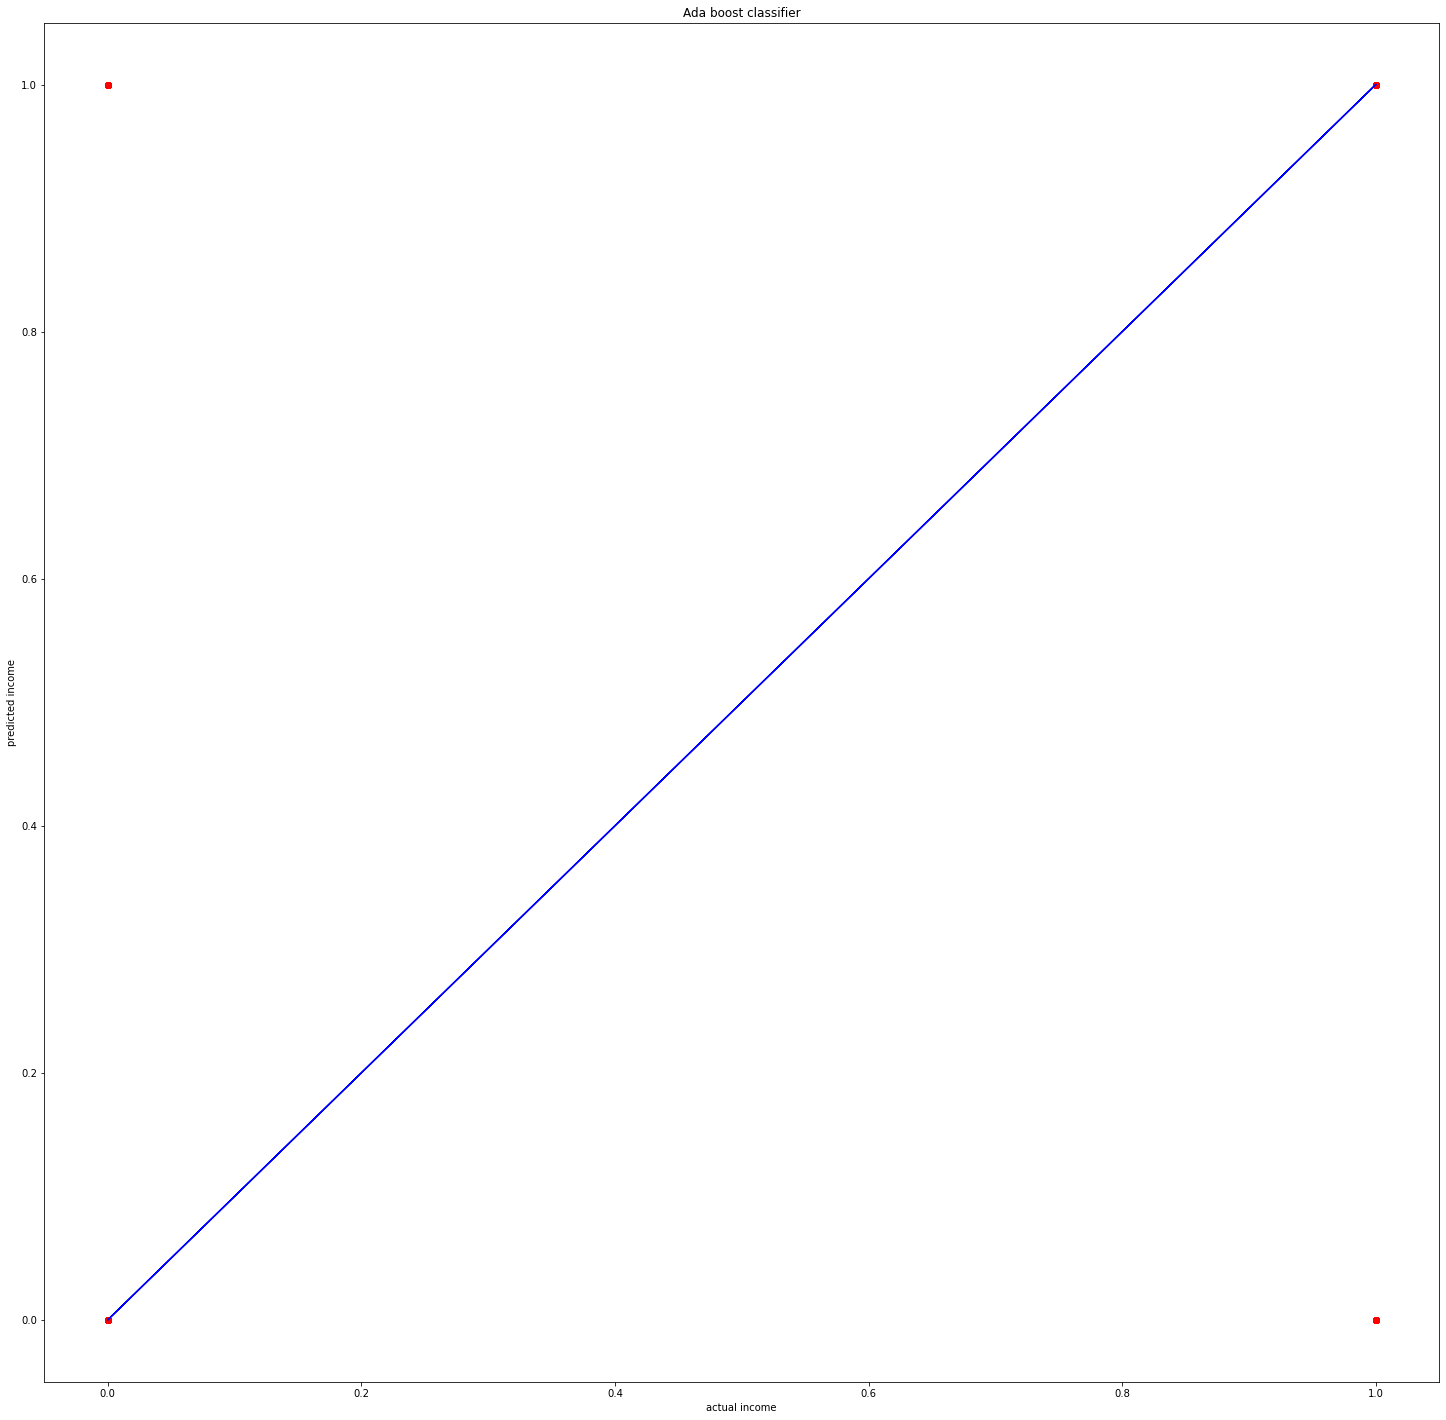

In [129]:
plt.scatter(x=y_test,y=y_pred,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('actual income')
plt.ylabel('predicted income')
plt.title('Ada boost classifier')

In [130]:
import numpy as np

In [131]:
a=np.array(y_test)

In [132]:
pred=np.array(ad.predict(x_test))

In [133]:
df_com=pd.DataFrame({'predicted':pred,'actual':a},index=range(len(a)))

In [134]:
df_com

,predicted,actual
0,0,1
1,0,0
2,0,0
3,0,1
4,0,0
...,...,...
9763,0,0
9764,0,0
9765,0,0
9766,1,1


In [135]:
## saving the model

In [136]:
import pickle

In [137]:
filename='CENSUS_INCOME_PROJECT.pkl'

In [140]:
filename='CENSUS_INCOME_PROJECT.pkl'